In [1]:
pip install opencv-python mediapipe scikit-learn numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow


In [5]:
import numpy
print(numpy.__version__)


2.2.6


In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import shutil
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from cv2 import imread, resize, IMREAD_GRAYSCALE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow import nn
from keras import models, layers, regularizers, optimizers, callbacks

warnings.filterwarnings('ignore')

In [4]:
data_path = "."  

  

X, y = [], []


for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if not os.path.isdir(folder_path):
        continue

    for img_file in os.listdir(folder_path):
        if img_file.endswith(".png"):  
            img_path = os.path.join(folder_path, img_file)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
            img = cv2.resize(img, (64, 64))  

            X.append(img)
            y.append(folder)  


X = np.array(X).reshape(-1, 64, 64, 1) / 255.0  
y = np.array(y)

print("✅ عدد الصور:", len(X))
print("✅ شكل X:", X.shape)
print("✅ عدد الفئات:", len(np.unique(y)))


✅ عدد الصور: 0
✅ شكل X: (0, 64, 64, 1)
✅ عدد الفئات: 0


In [5]:
import os

data_path = r"C:\Users\PointofSale\Downloads\archive\leapGestRecog"  

print("المجلدات الموجودة:")
print(os.listdir(data_path))


المجلدات الموجودة:
['.ipynb_checkpoints', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', 'codecraft task4.ipynb', 'gesture_cnn_model.h5', 'leapGestRecog', 'readme.txt']


In [6]:
import os
import cv2
import numpy as np

data_dir = r"C:\Users\PointofSale\Downloads\archive\leapGestRecog" 

X = []
y = []
img_size = 64


for person in os.listdir(data_dir):
    person_path = os.path.join(data_dir, person)
    if not os.path.isdir(person_path):
        continue
    
    print(f"جارٍ معالجة الفئة: {person}")

    for class_name in os.listdir(person_path):
        class_path = os.path.join(person_path, class_name)
        if not os.path.isdir(class_path):
            continue

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (img_size, img_size))
                X.append(img)
                y.append(class_name)
            except Exception as e:
                print(f"خطأ في تحميل الصورة {img_path}: {e}")

X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

print("✅ عدد الصور:", len(X))
print("✅ شكل X:", X.shape)
print("✅ عدد الفئات:", len(set(y)))


جارٍ معالجة الفئة: .ipynb_checkpoints
جارٍ معالجة الفئة: 00
جارٍ معالجة الفئة: 01
جارٍ معالجة الفئة: 02
جارٍ معالجة الفئة: 03
جارٍ معالجة الفئة: 04
جارٍ معالجة الفئة: 05
جارٍ معالجة الفئة: 06
جارٍ معالجة الفئة: 07
جارٍ معالجة الفئة: 08
جارٍ معالجة الفئة: 09
جارٍ معالجة الفئة: leapGestRecog
خطأ في تحميل الصورة C:\Users\PointofSale\Downloads\archive\leapGestRecog\leapGestRecog\00\01_palm: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

خطأ في تحميل الصورة C:\Users\PointofSale\Downloads\archive\leapGestRecog\leapGestRecog\00\02_l: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

خطأ في تحميل الصورة C:\Users\PointofSale\Downloads\archive\leapGestRecog\leapGestRecog\00\03_fist: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split


X = np.array(X).reshape(-1, 64, 64, 1)  
y = np.array(y)


X = X / 255.0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"🟢 X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"🔵 X_test: {X_test.shape}, y_test: {y_test.shape}")

🟢 X_train: (16000, 64, 64, 1), y_train: (16000,)
🔵 X_test: (4000, 64, 64, 1), y_test: (4000,)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')  
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\PointofSale\anaconda3\envs\gesture_clean\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


y_train_cat = to_categorical(y_train_encoded, num_classes=10)
y_test_cat = to_categorical(y_test_encoded, num_classes=10)



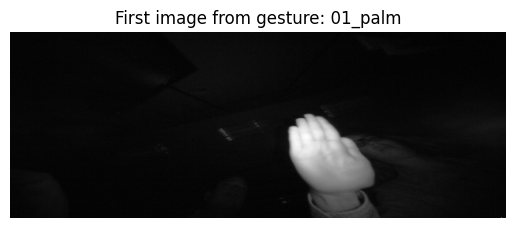

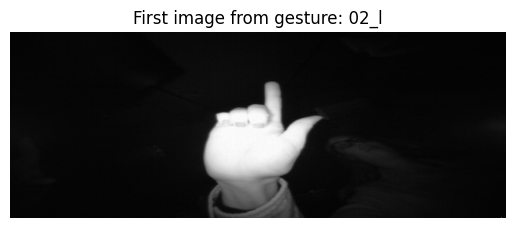

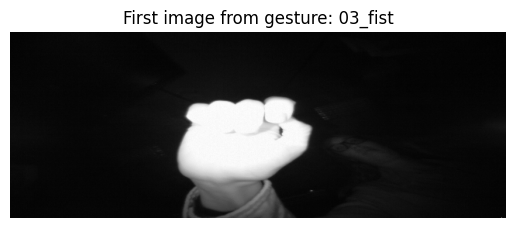

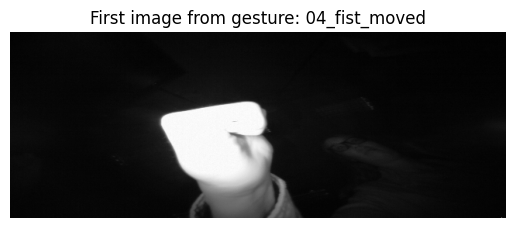

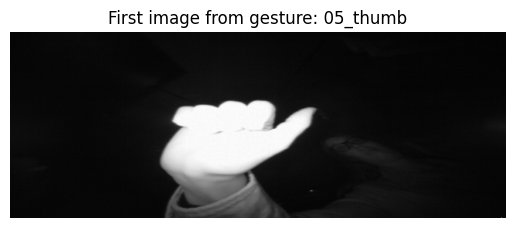

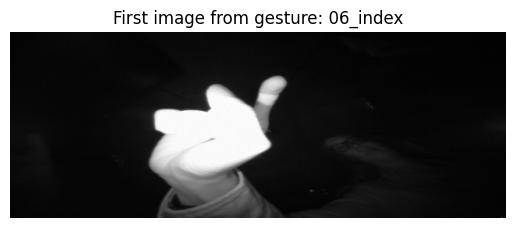

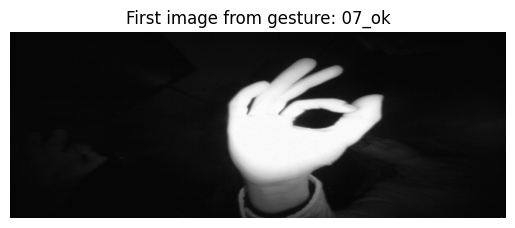

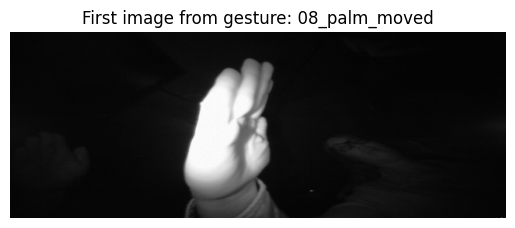

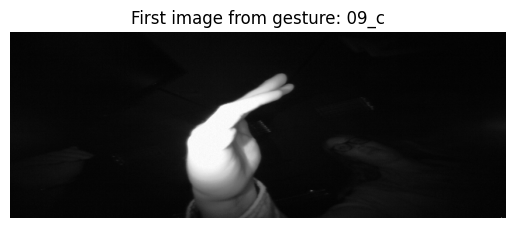

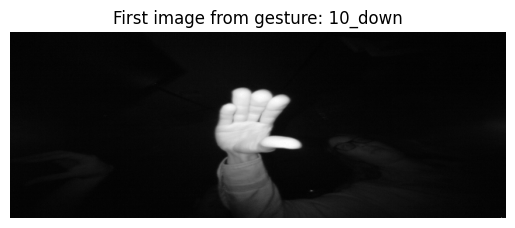

In [16]:

data_path = r"C:\Users\PointofSale\Downloads\archive\leapGestRecog" 

base_user = os.path.join(data_path, "00")
gesture_classes = os.listdir(base_user)

gesture_folders = [os.path.join(base_user, g) for g in gesture_classes if os.path.isdir(os.path.join(base_user, g))]

for folder in gesture_folders:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        img_array = cv2.imread(image_path, 0)  # 0 = gray
        if img_array is not None:
            plt.imshow(img_array, cmap='gray')
            plt.title(f"First image from gesture: {os.path.basename(folder)}")
            plt.axis('off')
            plt.show()
        break  


In [10]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


num_classes = len(label_encoder.classes_)  
y_train_cat = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_cat = to_categorical(y_test_encoded, num_classes=num_classes)


from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))  
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])  


history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    validation_data=(X_test, y_test_cat))


C:\Users\PointofSale\anaconda3\envs\gesture_clean\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.7041 - loss: 1.0101 - val_accuracy: 0.9862 - val_loss: 0.1169
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9890 - loss: 0.0893 - val_accuracy: 0.9962 - val_loss: 0.0380
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9961 - loss: 0.0302 - val_accuracy: 0.9995 - val_loss: 0.0135
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9985 - loss: 0.0133 - val_accuracy: 0.9998 - val_loss: 0.0072
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9995 - loss: 0.0070 - val_accuracy: 0.9990 - val_loss: 0.0063
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9996 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9983 - loss: 0.0084 - val_accuracy: 0.9973 - val_loss: 0.0133
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9995 - loss: 0.0044 - val_ac

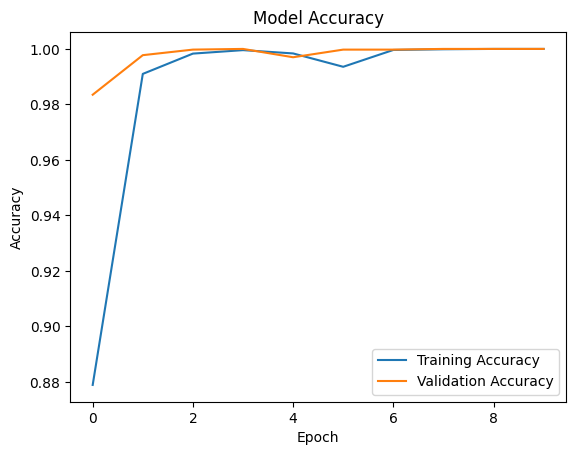

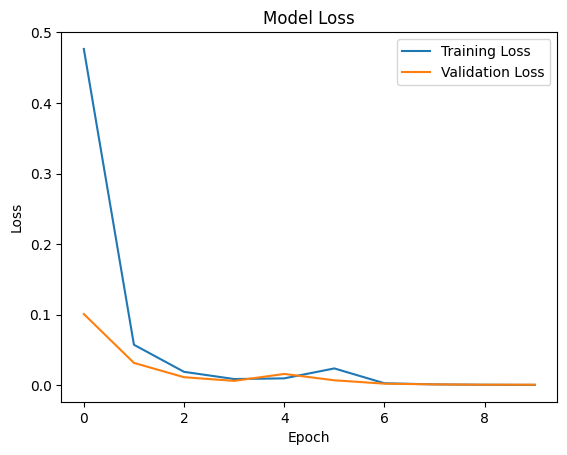

In [9]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:

model.save("gesture_cnn_model.h5")
print("Model saved successfully.")

In [ ]:
from tensorflow.keras.models import load_model


model = load_model("gesture_cnn_model.h5")
print("Model loaded successfully.")

In [11]:
import cv2
import numpy as np


img_path = r"C:\Users\PointofSale\Downloads\archive\leapGestRecog\00\01_palm\frame_00_01_0001.png"

 
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64, 64))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=-1)  
img = np.expand_dims(img, axis=0)   

pred = model.predict(img)
predicted_label = np.argmax(pred)
print("Predicted class:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
Predicted class: 0


In [12]:

img_path = r"C:\Users\PointofSale\Downloads\archive\leapGestRecog\00\01_palm\frame_00_01_0001.png"


img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64, 64))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=-1)  
img = np.expand_dims(img, axis=0)   


gesture_labels = [
    "Palm", "L", "Fist", "Fist_moved", "Thumb",
    "Index", "Ok", "Palm_moved", "C", "Down"
]


pred = model.predict(img)
predicted_label = np.argmax(pred)
gesture_name = gesture_labels[predicted_label]

print("Predicted class index:", predicted_label)
print("Predicted gesture:", gesture_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class index: 0
Predicted gesture: Palm


In [17]:
pip install pyautogui


Note: you may need to restart the kernel to use updated packages.Collecting pyautogui
  Using cached pyautogui-0.9.54-py3-none-any.whl
  Using cached pymsgbox-1.0.9-py3-none-any.whl
  Using cached pytweening-1.2.0-py3-none-any.whl
  Using cached pyscreeze-1.0.1-py3-none-any.whl
  Using cached pygetwindow-0.0.9-py3-none-any.whl
  Using cached mouseinfo-0.1.3-py3-none-any.whl
  Using cached pyrect-0.2.0-py2.py3-none-any.whl
  Using cached pyperclip-1.9.0-py3-none-any.whl

   ---------------------------------------- 0/8 [pytweening]
   ----- ---------------------------------- 1/8 [pyrect]
   ----- ---------------------------------- 1/8 [pyrect]
   ---------- ----------------------------- 2/8 [pyperclip]
   ---------- ----------------------------- 2/8 [pyperclip]
   --------------- ------------------------ 3/8 [pymsgbox]
   -------------------- ------------------- 4/8 [pyscreeze]
   ------------------------- -------------- 5/8 [pygetwindow]
   ------------------------------ --------- 6/8 [

In [14]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model


model = load_model('gesture_cnn_model.h5')


gesture_classes = ['Palm', 'L', 'Fist', 'Fist_moved', 'Thumb', 'Index', 'Ok', 'Palm_moved', 'C', 'Down']


IMG_WIDTH = 64
IMG_HEIGHT = 64


cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    x1, y1, x2, y2 = 300, 100, 600, 400
    roi = frame[y1:y2, x1:x2]

    
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)

    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 2)
    _, thresh = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    resized = cv2.resize(thresh, (IMG_WIDTH, IMG_HEIGHT))
    normalized = resized.astype('float32') / 255.0
    reshaped = normalized.reshape(1, IMG_WIDTH, IMG_HEIGHT, 1)

    
    prediction = model.predict(reshaped)
    class_id = np.argmax(prediction)
    gesture_name = gesture_classes[class_id]

    
    cv2.putText(frame, gesture_name, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)


    cv2.imshow("Webcam", frame)
    cv2.imshow("ROI", thresh)

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━

In [18]:
import cv2
import numpy as np
import time
import subprocess
from tensorflow.keras.models import load_model


model = load_model('gesture_cnn_model.h5')


gesture_classes = ['Palm', 'L', 'Fist', 'Fist_moved', 'Thumb', 'Index', 'Ok', 'Palm_moved', 'C', 'Down']


gesture_actions = {
    'Palm': lambda: subprocess.Popen(['calc']),                                
    'L': lambda: subprocess.Popen(['notepad']),                               
    'Fist': lambda: subprocess.Popen(['cmd', '/c', 'start https://www.google.com']), 
    'Fist_moved': lambda: subprocess.Popen(['cmd', '/c', 'start https://www.youtube.com']), 
    'Thumb': lambda: subprocess.call("nircmd.exe mutesysvolume 0"),           
    'Index': lambda: subprocess.call("nircmd.exe mutesysvolume 1"),           
    'Ok': lambda: subprocess.call("nircmd.exe savescreenshot screenshot.png"),
    'Palm_moved': lambda: subprocess.call("taskkill /f /im chrome.exe"),      
    'C': lambda: print("No action assigned to 'C'"),
    'Down': lambda: print("No action assigned to 'Down'")
}

IMG_WIDTH = 64
IMG_HEIGHT = 64

cap = cv2.VideoCapture(0)
last_executed = None
cooldown = 2  
last_time = time.time()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    x1, y1, x2, y2 = 300, 100, 600, 400
    roi = frame[y1:y2, x1:x2]

    
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)

    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 2)
    _, thresh = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    resized = cv2.resize(thresh, (IMG_WIDTH, IMG_HEIGHT))
    normalized = resized.astype('float32') / 255.0
    reshaped = normalized.reshape(1, IMG_WIDTH, IMG_HEIGHT, 1)

    
    prediction = model.predict(reshaped)
    class_id = np.argmax(prediction)
    gesture_name = gesture_classes[class_id]

   
    cv2.putText(frame, f"Gesture: {gesture_name}", (x1, y1-40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    current_time = time.time()
    if gesture_name != last_executed and (current_time - last_time) > cooldown:
        action = gesture_actions.get(gesture_name)
        if action:
            print(f"Gesture: {gesture_name} --> Action executed.")
            action()
            last_executed = gesture_name
            last_time = current_time

    
    cv2.imshow("Webcam", frame)
    cv2.imshow("ROI", thresh)

    key = cv2.waitKey(1)
    if key == 27:  # Esc
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
Gesture: Palm_moved --> Action executed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Gesture: L --> Action executed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Gesture: Palm_moved --> Action executed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/ste

FileNotFoundError: [WinError 2] The system cannot find the file specified